## Information on the Diamond Dataset
The dataset consists of almost 54,000 rows and 10 columns:

- price: Price in dollars. Data was collected in 2008.
- carat: Diamond weight. 1 carat is equal to 0.2 grams.
- cut: Quality of diamond cut, affects its shine. Grades go from (low) Fair, Good, Very Good, Premium, Ideal (best).
- color: Measure of diamond coloration. Increasing grades go from (some color) J, I, H, G, F, E, D (colorless).
- clarity: Measure of diamond inclusions. Increasing grades go from (inclusions) I, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (internally flawless).
- x, y, z: Diamond length, width, and depth, respectively, in mm.
- table: Ratio of width of top face of diamond to its overall width, as a percentage.
- depth: Proportional depth of diamond, as a percentage. This is computed as 2 * z / (x + y), or the ratio of the depth to the average of length and width.

In [285]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
print("Imported libraries")

Imported libraries


In [286]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')
print("Loaded dataset")

Loaded dataset


## Dataset Overview

Before running straight into the exploration, let's just take a moment to get a high-level overview of the dataset. We can refer back to these points if we need to get our bearings on what we should expect to see from each variable.

In [4]:
# high-level overview of data shape and composition
print(diamonds.shape)
print(diamonds.dtypes)
diamonds.head(10)

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [217]:
cut_types=pd.api.types.CategoricalDtype(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
color_types=pd.api.types.CategoricalDtype(['J', 'I', 'H', 'G', 'F', 'E', 'D'])
clarity_types=pd.api.types.CategoricalDtype(['I', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])

diamonds['cut']=diamonds['cut'].astype(cut_types)
diamonds['color']=diamonds['color'].astype(color_types)
diamonds['clarity']=diamonds['clarity'].astype(clarity_types)
print(diamonds.dtypes)

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object


In [5]:
# descriptive statistics for numeric variables
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Univariate Exploration

Let's start our exploration by looking at the main variable of interest: price. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

It is highly right skewed. From graph below.

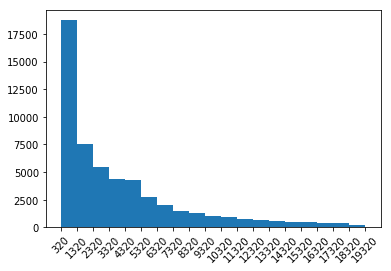

In [29]:
bins=np.arange(320,19000+1000,1000)
plt.hist(data=diamonds,x='price',bins=bins);
plt.xticks(bins,rotation=45);
# sb.countplot(data=diamonds,x='price');

Using log transformation. We can see Data is roughly bimodal.

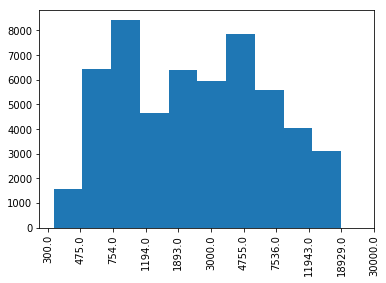

In [104]:
plt.hist(np.log10(diamonds.price));
ticks=np.arange(np.log10(300),np.log10(19000)+0.2,0.2)
labels=np.round(10**(ticks))
plt.xticks(ticks,labels,rotation=90);

Create a plot of our first diamond 'C' metric: carat weight. Is there an interesting pattern in these values?

Carat distribution comment: You should see an interesting pattern in carat weights, where there is a large spike around a single decimal value, then a gradual tailing off to the right until the next spike. In this case, it's a good idea to set the bin size small (e.g. 0.01) and zoom into a narrower range of values to clearly see the spikes in the data values. Perhaps these spikes come about as part of standard diamond size conventions?

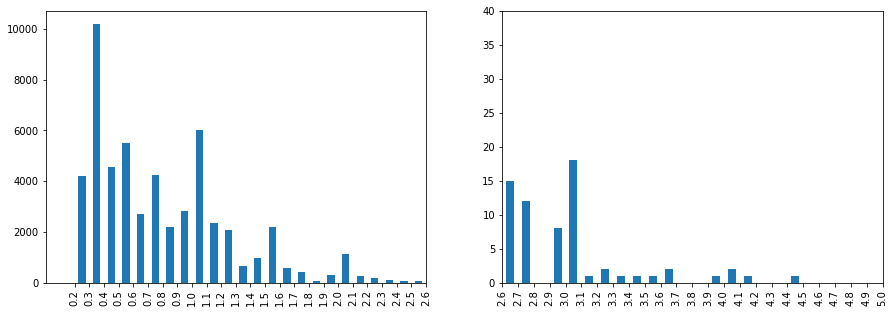

In [140]:
bins=np.arange(0.2,5+0.1,0.1)
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
plt.hist(data=diamonds,x='carat',bins=bins,rwidth=0.5);
plt.xticks(bins,rotation=90);
plt.xlim(0,2.6);
               
plt.subplot(1,2,2)
plt.hist(data=diamonds,x='carat',bins=bins,rwidth=0.5);
plt.xticks(bins,rotation=90);
plt.xlim(2.6,5.0);
plt.ylim(0,40);

Now, let's move on to exploring the other three 'C' quality measures: cut, color, and clarity. For each of these measures, does the data we have tend to be higher on the quality scale, or lower?

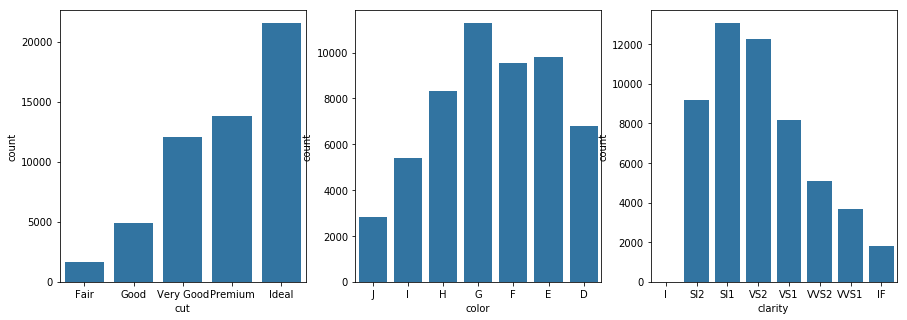

In [147]:
plt.figure(figsize=[15,5]);
base_color=sb.color_palette()[0]
plt.subplot(1,3,1)
sb.countplot(data=diamonds,x='cut',color=base_color);

plt.subplot(1,3,2)
sb.countplot(data=diamonds,x='color',color=base_color);

plt.subplot(1,3,3)
sb.countplot(data=diamonds,x='clarity',color=base_color);

# Bivariate Exploration
We'll investigate relationships between pairs of these variables, particularly how each of them relate to diamond price.

Price vs Carat.

We can notice a linear trend in right most graph.

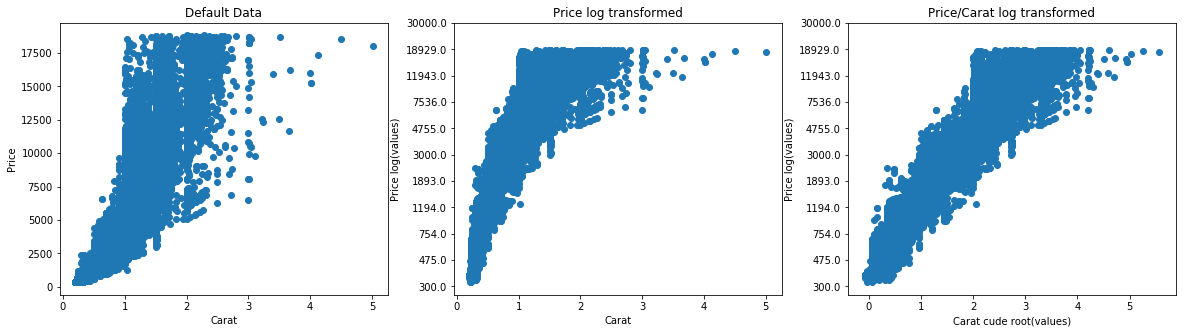

In [177]:
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
plt.scatter(y=diamonds.price,x=diamonds.carat);
plt.title('Default Data')
plt.xlabel('Carat')
plt.ylabel('Price')

plt.subplot(1,3,2)
plt.scatter(y=np.log10(diamonds.price),x=diamonds.carat);
ticks=np.arange(np.log10(300),np.log10(19000)+0.2,0.2)
labels=np.round(10**(ticks))
plt.title('Price log transformed')
plt.yticks(ticks,labels,rotation=0);
plt.xlabel('Carat')
plt.ylabel('Price log(values)')

plt.subplot(1,3,3)
plt.scatter(y=np.log10(diamonds.price),x=(diamonds.carat)**(1/3));
x_ticks=[0.6,0.8,1.0,1.2,1.4,1.6]
x_labels=['0','1','2','3','4','5']
plt.xticks(x_ticks,x_labels,rotation=0);
y_ticks=np.arange(np.log10(300),np.log10(19000)+0.2,0.2)
y_labels=np.round(10**(ticks))
plt.title('Price/Carat log transformed')
plt.yticks(y_ticks,y_labels,rotation=0);
plt.xlabel('Carat cude root(values)')
plt.ylabel('Price log(values)');

Now let's take a look at the relationship between price and the three categorical quality features, cut, color, and clarity.

If you created a box plot, then you probably noticed something interesting and unintuitive: the median price of diamonds should tend to look like it decrease with increasing gem quality. Shouldn't we expect this to be the other way around? This deserves a deeper look. Is there a different plot type to choose that shows more details in the data?

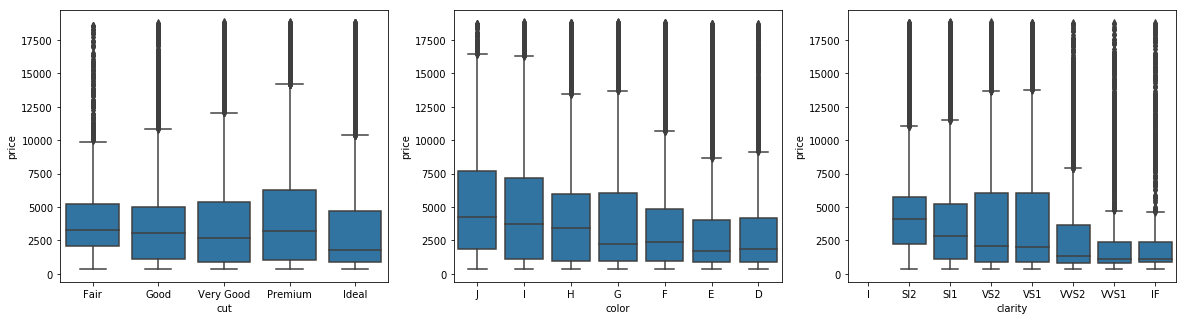

In [207]:
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
ax=sb.boxplot(data=diamonds,x='cut',y='price',color=base_color)

plt.subplot(1,3,2)
ax=sb.boxplot(data=diamonds,x='color',y='price',color=base_color)

plt.subplot(1,3,3)
ax=sb.boxplot(data=diamonds,x='clarity',y='price',color=base_color);

With a violin plot, you can get more insight into what causes the trend in median prices to appear as it does. Faceted histograms will also produce a similar result, though unless the faceting keeps the price axis common across facets, the trend will be harder to see. For each ordinal variable, there are multiple modes into which prices appear to fall. Going across increasing quality levels, you should see that the modes rise in price - this should be the expected effect of quality. However, you should also see that more of the data will be located in the lower-priced modes - this explains the unintuitive result noted in the previous comment. This is clearest in the clarity variable. Let's keep searching the data to see if there's more we can say about this pattern.

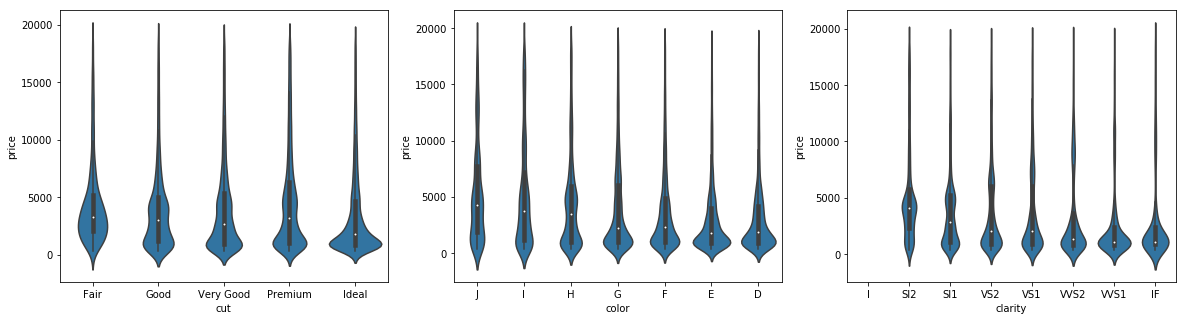

In [183]:
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
ax=sb.violinplot(data=diamonds,x='cut',y='price',color=base_color)

plt.subplot(1,3,2)
ax=sb.violinplot(data=diamonds,x='color',y='price',color=base_color)

plt.subplot(1,3,3)
ax=sb.violinplot(data=diamonds,x='clarity',y='price',color=base_color);

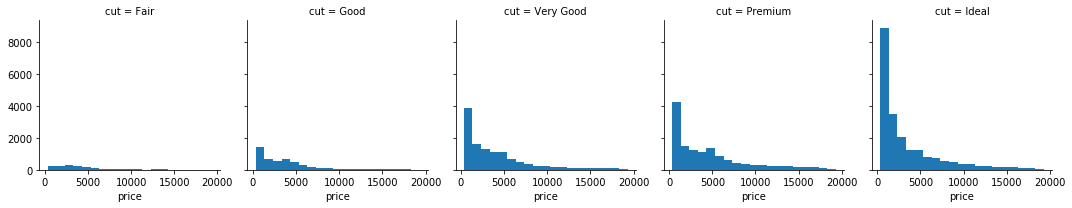

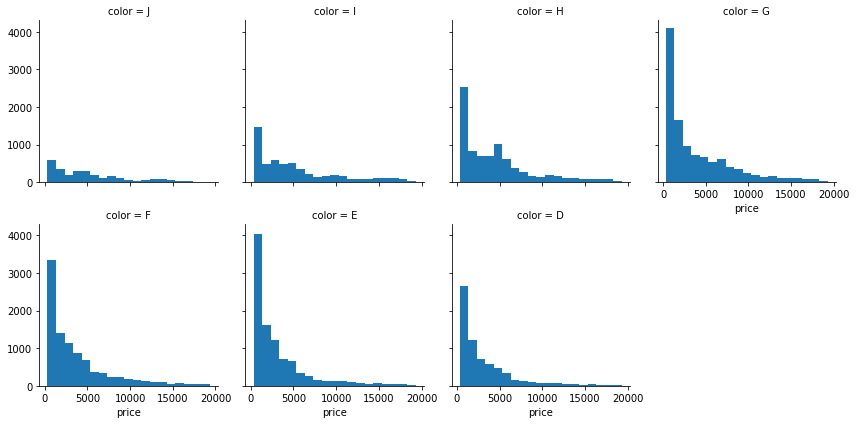

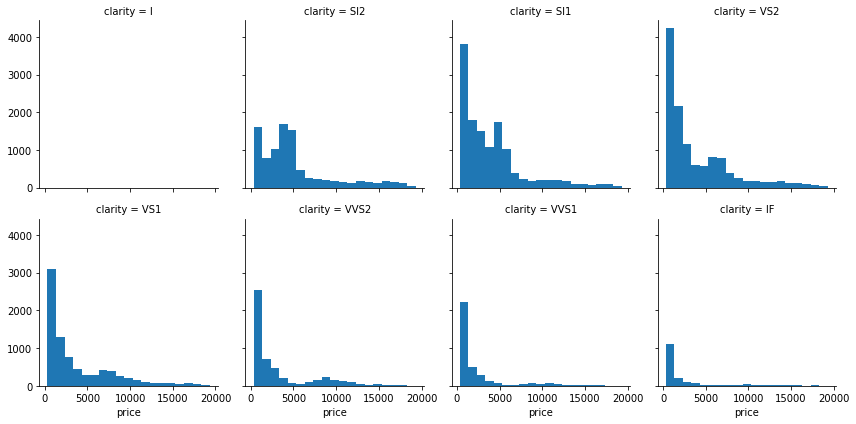

In [206]:
bins=np.arange(320,19000+1000,1000)

g=sb.FacetGrid(data=diamonds,col='cut')
g.map(plt.hist,'price',color=base_color,bins=bins);

g=sb.FacetGrid(data=diamonds,col='color',col_wrap=4)
g.map(plt.hist,'price',color=base_color,bins=bins);

g=sb.FacetGrid(data=diamonds,col='clarity',col_wrap=4)
g.map(plt.hist,'price',color=base_color,bins=bins);

Taking a look at some of the relationships between the independent variables. Namely, how does carat weight change across the other three 'C' quality measures? 

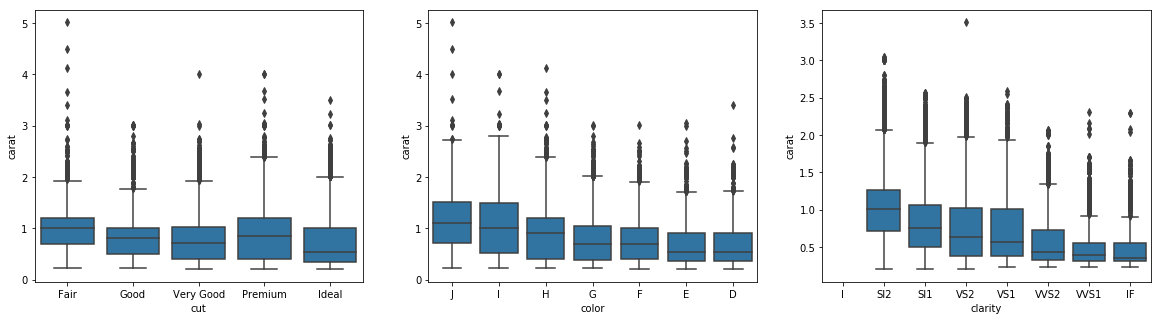

In [209]:
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
ax=sb.boxplot(data=diamonds,x='cut',y='carat',color=base_color)

plt.subplot(1,3,2)
ax=sb.boxplot(data=diamonds,x='color',y='carat',color=base_color)

plt.subplot(1,3,3)
ax=sb.boxplot(data=diamonds,x='clarity',y='carat',color=base_color);

 These plots should shed a lot more light into the patterns already seen. Larger diamonds are more likely to receive lower categorical quality grades, while high quality grades are more likely to have their numbers made up of smaller diamonds. Since carat weight appears to be a major driver of price, this helps to explain the surprising marginal effect of diamond quality against price. The challenge next will be on how to depict this in a multivariate plot.

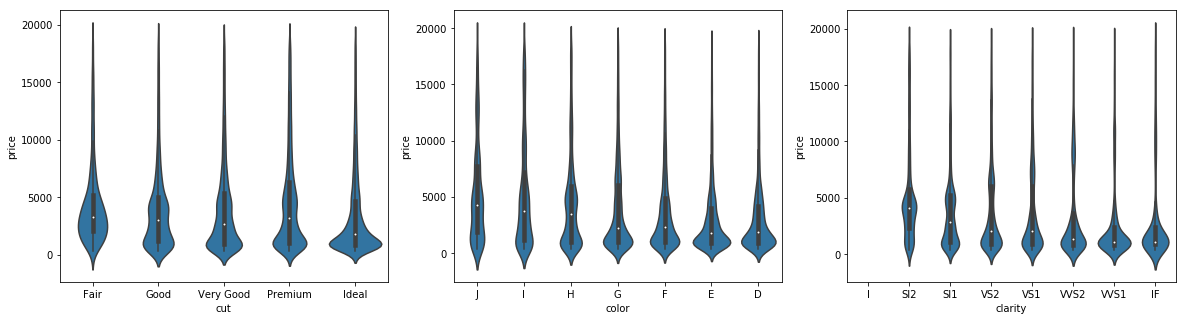

In [210]:
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
ax=sb.violinplot(data=diamonds,x='cut',y='price',color=base_color)

plt.subplot(1,3,2)
ax=sb.violinplot(data=diamonds,x='color',y='price',color=base_color)

plt.subplot(1,3,3)
ax=sb.violinplot(data=diamonds,x='clarity',y='price',color=base_color);

# Multivariate Exploration

In bivariate relationships, You saw that the log of price was approximately linearly related to the cube root of carat weight, as analogy to its length, width, and depth. You also saw that there was an unintuitive relationship between price and the categorical quality measures of cut, color, and clarity, that the median price decreased with increasing quality. Investigating the distributions more clearly and looking at the relationship between carat weight with the three categorical variables showed that this was due to carat size tending to be smaller for the diamonds with higher categorical grades.

Now the goal is to depict these interaction effects through the use of multivariate plots.

To start off with, lets create a plot of the relationship between price, carat, and clarity. Before, you saw that clarity had the clearest interactions with price and carat. How clearly does this show up in a multivariate visualization?

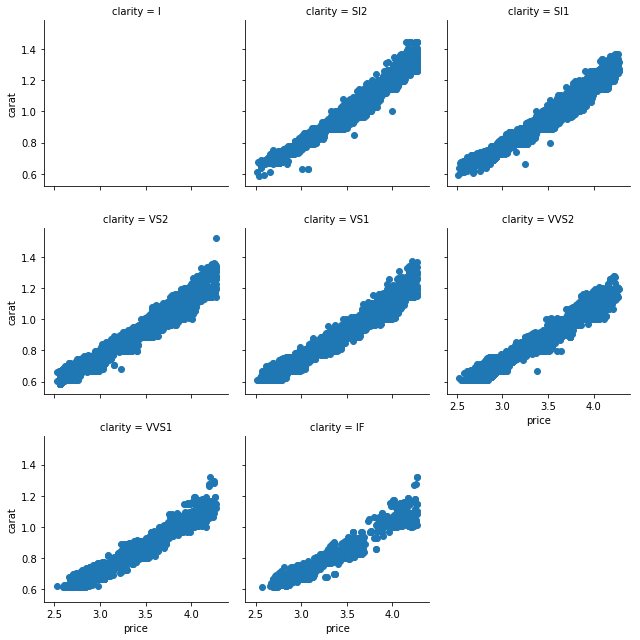

In [226]:
diamonds_transform=diamonds.copy()
diamonds_transform['price']=diamonds_transform['price'].apply(np.log10)
diamonds_transform['carat']=diamonds_transform['carat']**(1/3)
g=sb.FacetGrid(data=diamonds_transform,col='clarity',col_wrap=3)
g.map(plt.scatter,'price','carat');

Let's try a different plot, for diamond price against cut and color quality features. To avoid the trap of higher quality grades being associated with smaller diamonds, and thus lower prices, we should focus our visualization on only a small range of diamond weights. For this plot, select diamonds in a small range around 1 carat weight. Try to make it so that your plot shows the effect of each of these categorical variables on the price of diamonds.

In [261]:
diamonds_sample=diamonds[(0.99<=diamonds.carat) & (diamonds.carat<=1.03)]
diamonds_sample_trans=diamonds_sample.copy()
diamonds_sample_trans['price']=diamonds_sample['price'].apply(np.log10)
diamonds_sample_trans['carat']=diamonds_sample['carat']**(1/3)

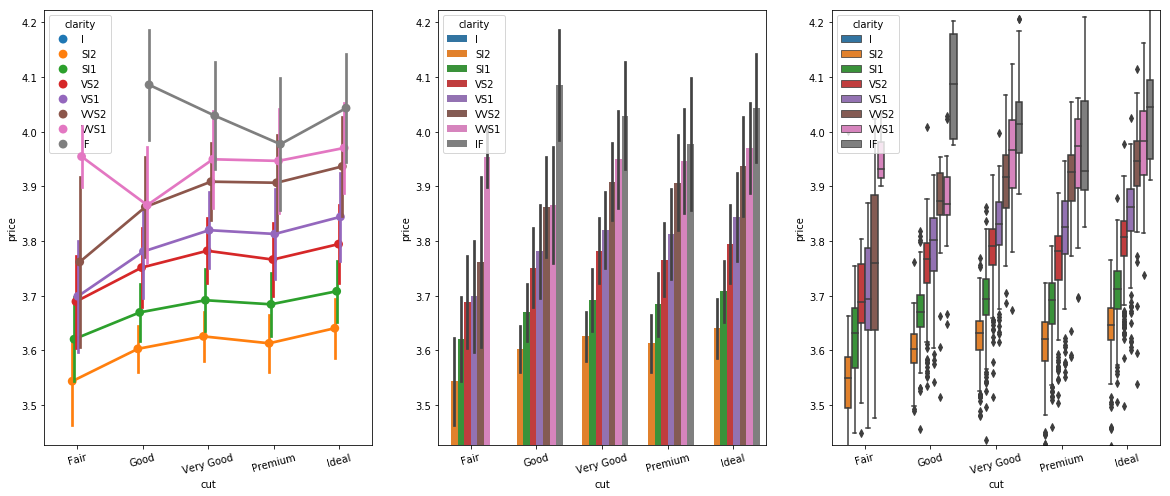

In [271]:
plt.figure(figsize=[20,8])
#point plot
plt.subplot(1,3,1)
seq_color=None #sb.color_palette('viridis_r', 8)
ax=sb.pointplot(data=diamonds_sample_trans,x='cut',y='price',
                hue='clarity', #multivariate
                dodge=True, #To remove overlapping
             ci='sd',  #Standard Deviation
         palette=seq_color)
plt.xticks(rotation=15)

#barplot
plt.subplot(1,3,2)
sb.barplot(data=diamonds_sample_trans,x='cut',y='price',
                hue='clarity', #multivariate
             ci='sd',palette=seq_color)
plt.xticks(rotation=15)
plt.ylim(ax.get_ylim())

plt.subplot(1,3,3)
sb.boxplot(data=diamonds_sample_trans,x='cut',y='price',hue='clarity',palette=seq_color)
plt.xticks(rotation=15)
plt.ylim(ax.get_ylim());

You should see a gradual increase in price across the main x-value clusters, as well as generally upwards trends within each cluster for the third variable.

# Explanatory Polishing

Price vs. Carat Polishing: Using the following list to make sure you've checked the major points of revision in this plot.

- Does the plot has an informative title?
- Are the axis labels informative?
    - **Price** and **Carat weight** are informative.
- Are the tick values interpretable?
    - We used transforamtions on the values, but transformed values are not interpretable, so we are adding the ticks and labels for appropriate interpretation.
- Do we need to worry about any of the plot aesthetics?
    - **'alpha'** parameter is added to focus on the general trend.

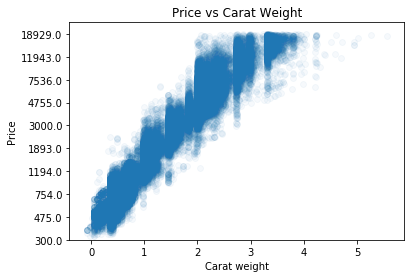

In [268]:
plt.scatter(y=np.log10(diamonds.price),x=(diamonds.carat)**(1/3),alpha=0.04);

x_ticks=[0.6,0.8,1.0,1.2,1.4,1.6]
x_labels=['0','1','2','3','4','5']
plt.xticks(x_ticks,x_labels,rotation=0);

y_ticks=np.arange(np.log10(300),np.log10(19000)+0.2,0.2)
y_labels=np.round(10**(y_ticks))
plt.yticks(y_ticks,y_labels,rotation=0);
plt.ylim(np.log10(300),np.log10(19000)+0.1);

plt.xlabel('Carat weight') #cude root(values)
plt.ylabel('Price'); # log(values)
plt.title('Price vs Carat Weight');

Polishing a multivariate plot of price against levels of color and cut, for diamonds of about 1 carat weight.

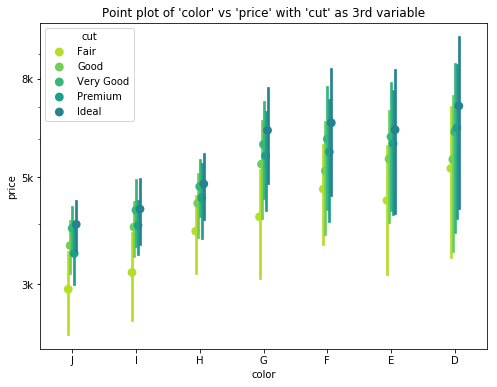

In [284]:
plt.figure(figsize = [8,6])

ax = sb.pointplot(data=diamonds_sample,x='color',y='price',
                  hue='cut', #multivariate
                  dodge=True, #To remove overlapping
                  ci='sd',  #Standard Deviation
                  palette=sb.color_palette('viridis_r', 8),
                     linestyles="")
# special handling of tick marks following seaborn function - you might try
# doing a log transform on the data itself instead of this workaround.
plt.yscale('log')
plt.yticks([3000, 5000, 8000], ['3k', '5k', '8k'])
ax.set_yticklabels([], minor = True)
plt.title("Point plot of 'color' vs 'price' with 'cut' as 3rd variable")
plt.show();

# Read again. For better Understanding